In [1]:
# Install required libraries
!pip install numpy pandas scikit-learn matplotlib seaborn nltk spacy

# Download NLTK data
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# Download spaCy model
!python -m spacy download en_core_web_sm

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 98.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


1. Load Data & Inspect

In [2]:
import pandas as pd
import numpy as np

# Example dataset
data = {
    "Name": ["Ali", "Sara", "Iqra", "Aon", "Ijaz", None],
    "Age": [25, np.nan, 30, 28, 40, 22],
    "Salary": [50000, 60000, None, 60000, 50000, 70000],
    "Department": ["IT", "HR", "Finance", "IT", None, "HR"]
}

df = pd.DataFrame(data)
print(df)
print("\nInfo:")
print(df.info())

   Name   Age   Salary Department
0   Ali  25.0  50000.0         IT
1  Sara   NaN  60000.0         HR
2  Iqra  30.0      NaN    Finance
3   Aon  28.0  60000.0         IT
4  Ijaz  40.0  50000.0       None
5  None  22.0  70000.0         HR

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        5 non-null      object 
 1   Age         5 non-null      float64
 2   Salary      5 non-null      float64
 3   Department  5 non-null      object 
dtypes: float64(2), object(2)
memory usage: 324.0+ bytes
None


2. Handling Missing Values

In [3]:
# Drop rows/columns with missing values
df_drop = df.dropna()

# Imputation
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")  # mean, median, most_frequent, constant
df["Age"] = imputer.fit_transform(df[["Age"]])

# Fill with constant
df["Salary"].fillna(55000, inplace=True)

print(df)

   Name   Age   Salary Department
0   Ali  25.0  50000.0         IT
1  Sara  29.0  60000.0         HR
2  Iqra  30.0  55000.0    Finance
3   Aon  28.0  60000.0         IT
4  Ijaz  40.0  50000.0       None
5  None  22.0  70000.0         HR


/tmp/ipython-input-3425374229.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Salary"].fillna(55000, inplace=True)


In [4]:
df["Age"] = df["Age"].astype(int)

4. Text Cleaning (Noise removal, Stopwords, Stemming, Lemmatization, Tokenization)

In [5]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import spacy

# Example text
text = "Ali's emails are: ali123@gmail.com!!! He is working very quickly."

# Remove noise (emails, punctuation, numbers)
clean_text = re.sub(r'\S+@\S+', '', text)  # remove emails
clean_text = re.sub(r'[^A-Za-z ]+', '', clean_text)  # keep only letters
print("Noise removed:", clean_text)

# Tokenization
tokens = word_tokenize(clean_text.lower())
print("Tokens:", tokens)

# Stopword removal
tokens = [w for w in tokens if w not in stopwords.words("english")]
print("Stopwords removed:", tokens)

# Stemming
stemmer = PorterStemmer()
stems = [stemmer.stem(w) for w in tokens]
print("Stemming:", stems)

# Lemmatization with NLTK
lemmatizer = WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(w) for w in tokens]
print("Lemmatization (NLTK):", lemmas)

# Lemmatization with spaCy
nlp = spacy.load("en_core_web_sm")
doc = nlp(" ".join(tokens))
lemmas_spacy = [token.lemma_ for token in doc]
print("Lemmatization (spaCy):", lemmas_spacy)

Noise removed: Alis emails are  He is working very quickly
Tokens: ['alis', 'emails', 'are', 'he', 'is', 'working', 'very', 'quickly']
Stopwords removed: ['alis', 'emails', 'working', 'quickly']
Stemming: ['ali', 'email', 'work', 'quickli']
Lemmatization (NLTK): ['ali', 'email', 'working', 'quickly']
Lemmatization (spaCy): ['ali', 'email', 'work', 'quickly']


5. Rescaling (Normalization + Standardization)

In [6]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler_norm = MinMaxScaler()
scaler_std = StandardScaler()

df[["Age", "Salary"]] = scaler_norm.fit_transform(df[["Age", "Salary"]])
print("Normalized:\n", df[["Age", "Salary"]])

df[["Age", "Salary"]] = scaler_std.fit_transform(df[["Age", "Salary"]])
print("Standardized:\n", df[["Age", "Salary"]])


Normalized:
         Age  Salary
0  0.166667    0.00
1  0.388889    0.50
2  0.444444    0.25
3  0.333333    0.50
4  1.000000    0.00
5  0.000000    1.00
Standardized:
             Age    Salary
0 -7.145896e-01 -1.083473
1 -1.785046e-16  0.361158
2  1.786474e-01 -0.361158
3 -1.786474e-01  0.361158
4  1.965121e+00 -1.083473
5 -1.250532e+00  1.805788


6. Handling Duplicates & Outliers

In [7]:
# Duplicate removal
df = df.drop_duplicates()

# Outliers: Z-score
from scipy import stats
z_scores = np.abs(stats.zscore(df[["Age", "Salary"]]))
df_no_outliers = df[(z_scores < 3).all(axis=1)]

# Outliers: IQR
Q1 = df["Salary"].quantile(0.25)
Q3 = df["Salary"].quantile(0.75)
IQR = Q3 - Q1
df_iqr = df[~((df["Salary"] < (Q1 - 1.5 * IQR)) | (df["Salary"] > (Q3 + 1.5 * IQR)))]

7. Encoding Categorical Data

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label Encoding
le = LabelEncoder()
df["Dept_Label"] = le.fit_transform(df["Department"].astype(str))

# One Hot Encoding
df = pd.get_dummies(df, columns=["Department"])
print(df)

   Name           Age    Salary  Dept_Label  Department_Finance  \
0   Ali -7.145896e-01 -1.083473           2               False   
1  Sara -1.785046e-16  0.361158           1               False   
2  Iqra  1.786474e-01 -0.361158           0                True   
3   Aon -1.786474e-01  0.361158           2               False   
4  Ijaz  1.965121e+00 -1.083473           3               False   
5  None -1.250532e+00  1.805788           1               False   

   Department_HR  Department_IT  
0          False           True  
1           True          False  
2          False          False  
3          False           True  
4          False          False  
5           True          False  


8. Feature Engineering

In [9]:
# Example: Salary per Age ratio
df["Salary_per_Age"] = df["Salary"] / (df["Age"] + 1)
print(df.head())

   Name           Age    Salary  Dept_Label  Department_Finance  \
0   Ali -7.145896e-01 -1.083473           2               False   
1  Sara -1.785046e-16  0.361158           1               False   
2  Iqra  1.786474e-01 -0.361158           0                True   
3   Aon -1.786474e-01  0.361158           2               False   
4  Ijaz  1.965121e+00 -1.083473           3               False   

   Department_HR  Department_IT  Salary_per_Age  
0          False           True       -3.796192  
1           True          False        0.361158  
2          False          False       -0.306417  
3          False           True        0.439711  
4          False          False       -0.365406  


9. Merging Datasets (Join & Concat)

In [10]:
df1 = pd.DataFrame({"ID":[1,2,3], "Name":["Ali","Sara","Iqra"]})
df2 = pd.DataFrame({"ID":[1,2,3], "Dept":["IT","HR","Finance"]})

merged = pd.merge(df1, df2, on="ID")  # Join
concatenated = pd.concat([df1, df2], axis=1)  # Concat
print(merged, "\n", concatenated)

   ID  Name     Dept
0   1   Ali       IT
1   2  Sara       HR
2   3  Iqra  Finance 
    ID  Name  ID     Dept
0   1   Ali   1       IT
1   2  Sara   2       HR
2   3  Iqra   3  Finance


10. Dimensionality Reduction (PCA & t-SNE)

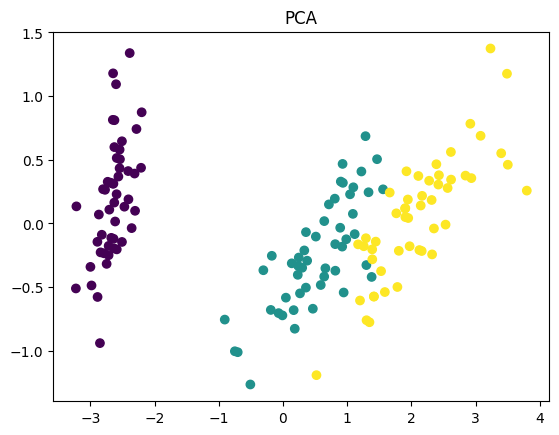

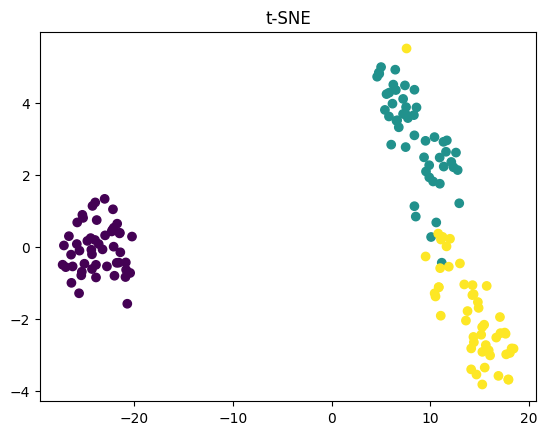

In [11]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:,0], X_pca[:,1], c=iris.target)
plt.title("PCA")
plt.show()

# t-SNE
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=iris.target)
plt.title("t-SNE")
plt.show()


11. Feature Selection

In [12]:
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.linear_model import LogisticRegression

# Filter Method (ANOVA F-test)
X, y = iris.data, iris.target
X_new = SelectKBest(f_classif, k=2).fit_transform(X, y)

# Wrapper Method (RFE)
model = LogisticRegression(max_iter=200)
rfe = RFE(model, n_features_to_select=2)
X_rfe = rfe.fit_transform(X, y)

# Embedded Method (L1 Regularization)
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X, y)
print("Lasso Coefficients:", lasso.coef_)

Lasso Coefficients: [-0.05973859 -0.          0.2654569   0.47187296]
